In [18]:
# Importing Libraries
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Setting Plot Style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [20]:
df = pd.read_json('/content/_position__202505242231.json')
# Displays the first 5 entries of the 'position' column
print(df['position'].head().to_string())

0    {'id': 848, 'symbol': 'DOGEUSDT', 'direction':...
1    {'id': 877, 'symbol': 'OMUSDT', 'direction': '...
2    {'id': 786, 'symbol': 'SUSDT', 'direction': 'L...
3    {'id': 957, 'symbol': 'ACTUSDT', 'direction': ...
4    {'id': 971, 'symbol': '1000RATSUSDT', 'directi...


In [21]:
# Displays the data type of the first entry in the 'position' column
print(type(df['position'][0]))


<class 'dict'>


In [22]:
# Displays all keys of the first dictionary in the 'position' column
if isinstance(df['position'][0], dict):
    print(df['position'][0].keys())
else:
    print("The first entry is not a dictionary.")

dict_keys(['id', 'symbol', 'direction', 'entryPrice', 'stopLoss', 'status', 'exitPrice', 'profitPercentage', 'currentTraders', 'closeReason', 'openedAt', 'closedAt', 'cooldown', 'cooldownUntil', 'forcePercentage', 'riskScore', 'atrValue', 'tp1', 'tp2', 'tp3', 'slPercentage', 'tp1Percentage', 'tp2Percentage', 'tp3Percentage', 'tp1Size', 'tp2Size', 'tp3Size', 'hitTp1', 'hitTp2', 'tp1ExitPrice', 'tp2ExitPrice', 'tp1ProfitPercentage', 'tp2ProfitPercentage', 'finalProfitPercentage', 'isGolden', 'traderId', 'openByAdmin', 'isSignalFromTelegram', 'macdSignal', 'ema50', 'adx14', 'marketVolatilityIndex', 'breakoutConfidence', 'trendConfidence', 'rsiValue', 'macdValue', 'ema10', 'score', 'macdHistogram', 'stochRsiK', 'stochRsiD', 'ema20', 'ema200', 'supertrendValue', 'supertrendDirection', 'bollingerUpper', 'bollingerMiddle', 'bollingerLower', 'bollingerWidth', 'bollingerPercentB', 'dmiPlus', 'dmiMinus', 'obv', 'volumeEMA', 'buyVolume', 'sellVolume', 'volumeRatio', 'hasRecentHigherHigh', 'hasRec

In [23]:
# Displays the complete first entry of the 'position' column
import json
print(json.dumps(df['position'][0], indent=4))

{
    "id": 848,
    "symbol": "DOGEUSDT",
    "direction": "SHORT",
    "entryPrice": 0.20622000000000001,
    "stopLoss": 0.2154999,
    "status": "CLOSED",
    "exitPrice": 0.20538,
    "profitPercentage": null,
    "currentTraders": 1,
    "closeReason": "TRADERS_EXIT",
    "openedAt": "2025-02-25T01:45:15.622Z",
    "closedAt": "2025-02-26T21:53:08.013Z",
    "cooldown": true,
    "cooldownUntil": "2025-02-27T03:53:08.013Z",
    "forcePercentage": 32.47,
    "riskScore": 6.65,
    "atrValue": 3.324856,
    "tp1": 0.2000334,
    "tp2": 0.1938468,
    "tp3": 0.1876602,
    "slPercentage": 4.5,
    "tp1Percentage": 3.0,
    "tp2Percentage": 6.0,
    "tp3Percentage": 9.0,
    "tp1Size": 3.0,
    "tp2Size": 6.0,
    "tp3Size": 9.0,
    "hitTp1": true,
    "hitTp2": false,
    "tp1ExitPrice": 0.19999,
    "tp2ExitPrice": null,
    "tp1ProfitPercentage": 3.02,
    "tp2ProfitPercentage": null,
    "finalProfitPercentage": 1.06,
    "isGolden": false,
    "traderId": "TELEGRAM_SIGNAL",
   

In [24]:
# Normalize the 'position' column
df_flat = pd.json_normalize(df['position'])

# Display the first rows of the new flattened DataFrame
print(df_flat.head())

# Display general information of the new flattened DataFrame (columns and data types)
print(df_flat.info())

    id        symbol direction  entryPrice  stopLoss  status  exitPrice  \
0  848      DOGEUSDT     SHORT     0.20622  0.215500  CLOSED    0.20538   
1  877        OMUSDT     SHORT     7.66967  8.014805  CLOSED    7.25860   
2  786         SUSDT      LONG     0.83260  0.795133  CLOSED    0.89870   
3  957       ACTUSDT      LONG     0.20901  0.199605  CLOSED    0.20339   
4  971  1000RATSUSDT      LONG     0.02571  0.024553  CLOSED    0.02814   

  profitPercentage  currentTraders   closeReason  ... isGoodDirection score2  \
0             None               1  TRADERS_EXIT  ...            True   5.39   
1             None               1  TRADERS_EXIT  ...            True  11.48   
2             None               1           TP3  ...            True   6.60   
3             None               1  TRADERS_EXIT  ...            True   7.70   
4             None               1           TP3  ...            True   6.00   

   shouldWork isOpportunity  tvRecommendation  tvSummary  tvInterval

In [25]:
# --- Step 2: Data Cleaning and Preparation ---

# 1. Convert datetime columns to datetime objects
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce') # 'coerce' will convert errors to NaT (Not a Time)

# 2. Analyze and consider `profitPercentage` (we already noted it's all null)
# If we are not going to use it and it's all null, we can even remove it to clean up the DataFrame
# df_flat = df_flat.drop(columns=['profitPercentage'])

# 3. Fill null values in `finalProfitPercentage` for analysis, or focus on non-nulls
# For performance analysis of closed positions, we are interested in actual values.
# If we wanted to use this column for real-time calculation, we would need a strategy for NaNs.
# For now, we simply note their existence.

# Optional: Convert boolean columns with objects/NaN to bool if necessary (e.g., hasRecentHigherHigh)
# These columns like 'hasRecentHigherHigh' and 'hasRecentLowerLow' are objects and have nulls.
# Let's convert them to boolean. NaNs will be converted to False, which is reasonable behavior if there is no information.
bool_cols_to_convert = ['hasRecentHigherHigh', 'hasRecentLowerLow']
for col in bool_cols_to_convert:
    df_flat[col] = df_flat[col].astype(bool) # This will convert True/False to bool, and None/NaN to False

# Display updated DataFrame information
print("--- DataFrame after initial cleaning ---")
print(df_flat.info())

# Display some of the datetime columns to verify conversion
print("\n--- Converted dates (first 5 rows) ---")
print(df_flat[['openedAt', 'closedAt', 'cooldownUntil']].head())

--- DataFrame after initial cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2153 entries, 0 to 2152
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     2153 non-null   int64              
 1   symbol                 2153 non-null   object             
 2   direction              2153 non-null   object             
 3   entryPrice             2153 non-null   float64            
 4   stopLoss               2153 non-null   float64            
 5   status                 2153 non-null   object             
 6   exitPrice              2141 non-null   float64            
 7   profitPercentage       0 non-null      object             
 8   currentTraders         2153 non-null   int64              
 9   closeReason            2141 non-null   object             
 10  openedAt               2153 non-null   datetime64[ns, UTC]
 11  closedAt       

In [26]:
# Ensure datetime columns are in datetime format
datetime_cols = ['openedAt', 'closedAt', 'cooldownUntil']
for col in datetime_cols:
    df_flat[col] = pd.to_datetime(df_flat[col], errors='coerce')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df_flat['day_of_week'] = df_flat['openedAt'].dt.dayofweek

# Ensure finalProfitPercentage is numeric and handle nulls
# To calculate effectiveness, we will only consider trades where the final profitPercentage is known.
# We will fill NaNs with 0 to avoid calculation errors, but acknowledging that they are missing data.
# Or, even better, for evaluation, we will filter only the CLOSED trades with profit.

# Optional: Convert boolean columns with objects/NaN to bool if necessary (e.g., hasRecentHigherHigh)
# These columns like 'hasRecentHigherHigh' and 'hasRecentLowerLow' are objects and have nulls.
# Let's convert them to boolean. NaNs will be converted to False, which is reasonable behavior if there is no information.
df_flat['finalProfitPercentage'] = pd.to_numeric(df_flat['finalProfitPercentage'], errors='coerce')

# For evaluation, we will focus on positions that have been closed and have a final profitPercentage.
# We create a DataFrame containing only closed positions for precise performance analysis.
df_closed_positions = df_flat[df_flat['status'] == 'CLOSED'].copy()

# Optional: Remove rows where finalProfitPercentage is NaN if we only want to evaluate trades with known results
df_closed_positions.dropna(subset=['finalProfitPercentage'], inplace=True)

print("--- Prepared Closed Positions DataFrame ---")
print(df_closed_positions[['symbol', 'openedAt', 'closedAt', 'finalProfitPercentage', 'day_of_week']].head())
print(f"Number of closed positions for analysis: {len(df_closed_positions)}")

--- Prepared Closed Positions DataFrame ---
         symbol                         openedAt  \
0      DOGEUSDT 2025-02-25 01:45:15.622000+00:00   
1        OMUSDT 2025-02-25 14:15:14.778000+00:00   
2         SUSDT 2025-02-23 12:06:36.746000+00:00   
3       ACTUSDT 2025-02-27 20:30:36.970000+00:00   
4  1000RATSUSDT 2025-02-28 07:44:34.225000+00:00   

                          closedAt  finalProfitPercentage  day_of_week  
0 2025-02-26 21:53:08.013000+00:00                   1.06            1  
1 2025-02-26 21:53:10.443000+00:00                   5.25            1  
2 2025-02-23 18:24:30.376000+00:00                   7.94            6  
3 2025-02-27 20:58:41.180000+00:00                  -2.69            3  
4 2025-02-28 10:39:25.257000+00:00                   9.45            4  
Number of closed positions for analysis: 2141


In [27]:
# --- Step 3: Define and Evaluate Entry Strategies (for LONG direction) ---

# We will focus on positions that were opened with a 'LONG' direction.
df_long_closed = df_closed_positions[df_closed_positions['direction'] == 'LONG'].copy()

print("\n--- Entry Strategy Evaluation (LONG only) ---")

strategies = {
    # Strategies based on pre-existing/composite signals
    'Strategy_1_isOpportunity': lambda df: df['isOpportunity'] == True,
    'Strategy_2_shouldWork': lambda df: df['shouldWork'] == True,
    'Strategy_3_GoodDir_ShouldWork': lambda df: (df['isGoodDirection'] == True) & (df['shouldWork'] == True),
    'Strategy_4_ScoreHigh': lambda df: df['score'] > 7.0, # Arbitrary threshold, we can adjust it
    'Strategy_5_Score2High': lambda df: df['score2'] > 8.0, # Arbitrary threshold, we can adjust it

    # Strategies based on key technical indicators
    'Strategy_6_RSI_Oversold': lambda df: df['rsiValue'] < 30,
    'Strategy_7_MACD_Bullish': lambda df: df['macdHistogram'] > 0,
    'Strategy_8_EMA_Cross_ShortTerm': lambda df: (df['ema10'] > df['ema20']), # EMA10 over EMA20
    'Strategy_9_Supertrend_Up': lambda df: df['supertrendDirection'] == 'UP',
    'Strategy_10_Bollinger_BottomReversal': lambda df: (df['bollingerPercentB'] < 0.2) & (df['rsiValue'] < 40), # Price near lower band
    'Strategy_11_Volume_IncreasedBuy': lambda df: df['buyVolume'] > df['sellVolume'], # More buy volume than sell volume
    'Strategy_12_ADX_TrendStrength': lambda df: (df['adx14'] > 25) & (df['dmiPlus'] > df['dmiMinus']), # Strong bullish trend

    # Combined Strategies (examples)
    'Strategy_13_Compound_1': lambda df: (df['isOpportunity'] == True) & (df['rsiValue'] < 40) & (df['macdHistogram'] > 0),
    'Strategy_14_Compound_2': lambda df: (df['shouldWork'] == True) & (df['ema10'] > df['ema20']) & (df['supertrendDirection'] == 'UP'),
    'Strategy_15_RiskScore_Low': lambda df: df['riskScore'] < 5.0, # Try to enter low-risk trades
    'Strategy_16_TrendConf_High': lambda df: df['trendConfidence'] > 60.0, # Enter only with high trend confidence
}

results = {}

for name, strategy_func in strategies.items():
    # Apply the strategy to obtain signals
    # It's important to use the original DataFrame (df_flat) or at least one that includes non-closed trades
    # to generate the SIGNALS, as an entry signal is generated before a trade is closed.
    # But to EVALUATE PERFORMANCE, we will use df_long_closed.

    # Here we are simulating that these strategies *would have generated* an entry signal.
    # For performance evaluation, we filter already closed positions that meet the signal.

    # Identify the IDs of positions that meet the entry strategy in the complete DataFrame (df_flat)
    signal_ids = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']

    # Filter *closed* positions that triggered this entry signal
    trades_with_signal = df_long_closed[df_long_closed['id'].isin(signal_ids)].copy()

    total_trades = len(trades_with_signal)

    if total_trades > 0:
        profitable_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] > 0]
        num_profitable = len(profitable_trades)

        profit_percentage = (num_profitable / total_trades) * 100
        avg_profit = trades_with_signal['finalProfitPercentage'].mean()

        # Calculate the average loss (only for losing trades)
        losing_trades = trades_with_signal[trades_with_signal['finalProfitPercentage'] < 0]
        avg_loss = losing_trades['finalProfitPercentage'].mean() if len(losing_trades) > 0 else 0

        # Average Risk/Reward Ratio (very simplified, only based on average profit/loss)
        # A positive ratio means that, on average, we gain more than we lose.
        risk_reward_ratio = abs(avg_profit / avg_loss) if avg_loss != 0 else float('inf') # Inf if there are no losses

        results[name] = {
            'Total Signals (LONG)': len(signal_ids), # Number of times the signal was triggered (could include trades not yet closed)
            'Closed Trades with Signal': total_trades, # Number of closed trades that triggered this signal
            'Profitable Trades': num_profitable,
            'Win Rate (%)': round(profit_percentage, 2),
            'Average Profit (%)': round(avg_profit, 2),
            'Average Loss (%)': round(avg_loss, 2),
            'Risk/Reward Ratio (Avg)': round(risk_reward_ratio, 2) if risk_reward_ratio != float('inf') else 'Inf'
        }
    else:
        results[name] = {
            'Total Signals (LONG)': len(signal_ids),
            'Closed Trades with Signal': 0,
            'Profitable Trades': 0,
            'Win Rate (%)': 0.0,
            'Average Profit (%)': 0.0,
            'Average Loss (%)': 0.0,
            'Risk/Reward Ratio (Avg)': 0.0
        }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Strategy'

# Sort by Average Profit and then Win Rate
results_df_sorted = results_df.sort_values(by=['Average Profit (%)', 'Win Rate (%)'], ascending=[False, False])

print("\n--- Summary of Entry Strategy Performance (LONG) ---")
print(results_df_sorted.to_string())


--- Entry Strategy Evaluation (LONG only) ---

--- Summary of Entry Strategy Performance (LONG) ---
                                      Total Signals (LONG)  Closed Trades with Signal  Profitable Trades  Win Rate (%)  Average Profit (%)  Average Loss (%)  Risk/Reward Ratio (Avg)
Strategy                                                                                                                                                                             
Strategy_1_isOpportunity                               294                        291                174         59.79                1.30             -3.99                     0.33
Strategy_3_GoodDir_ShouldWork                          750                        749                427         57.01                1.28             -3.83                     0.33
Strategy_2_shouldWork                                 1050                       1039                600         57.75                1.22             -3.83               

In [28]:
# --- Step 4: Influence of Day of the Week ---

print("\n--- Analysis by Day of the Week for Selected Strategies ---")

# Select the strategies that seem most promising from the table above
# You can choose the top 3 or 5, or any other that interests you.
# For example, let's take the strategy with the highest "Average Profit (%)"
top_strategy_name = results_df_sorted.index[0]
top_strategy_func = strategies[top_strategy_name]

print(f"\nAnalyzing strategy: {top_strategy_name}")

# Filter trades that activated the top strategy and are LONG and closed
signal_ids_top_strategy = df_flat[top_strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
trades_top_strategy = df_long_closed[df_long_closed['id'].isin(signal_ids_top_strategy)].copy()

if len(trades_top_strategy) > 0:
    # Group by day of the week and calculate metrics
    daily_performance = trades_top_strategy.groupby('day_of_week')['finalProfitPercentage'].agg(
        total_trades='count',
        avg_profit='mean',
        positive_trades=lambda x: (x > 0).sum()
    ).reset_index()

    daily_performance['profit_percentage'] = (daily_performance['positive_trades'] / daily_performance['total_trades']) * 100

    # Map the day of the week number to names
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    daily_performance['day_name'] = daily_performance['day_of_week'].map(day_names)

    print(daily_performance[['day_name', 'total_trades', 'avg_profit', 'profit_percentage']].sort_values('avg_profit', ascending=False).to_string())
else:
    print(f"No closed trades for strategy '{top_strategy_name}' to analyze by day of the week.")


--- Analysis by Day of the Week for Selected Strategies ---

Analyzing strategy: Strategy_1_isOpportunity
    day_name  total_trades  avg_profit  profit_percentage
2  Wednesday            47    2.912766          76.595745
3   Thursday            28    2.310714          67.857143
5   Saturday            43    1.620465          65.116279
1    Tuesday            70    1.103714          55.714286
0     Monday            27    0.365926          55.555556
4     Friday            46    0.314348          50.000000
6     Sunday            30    0.179333          46.666667



--- Detailed Performance Analysis for Strategy_1_isOpportunity ---

--- 5.1 Results by Day of the Week ---


<ipython-input-31-90f13e3860b5>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')


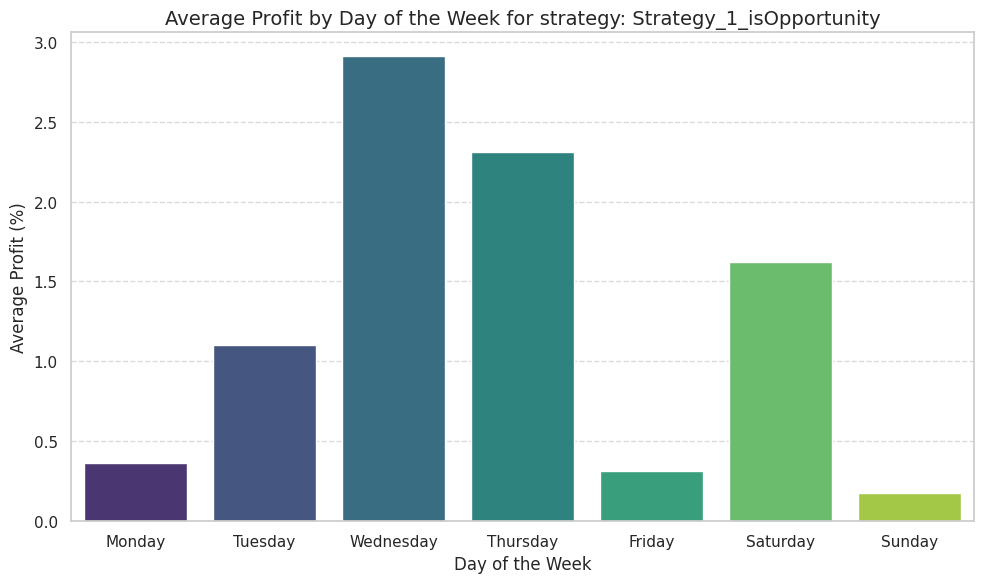

<ipython-input-31-90f13e3860b5>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_name', y='finalProfitPercentage',


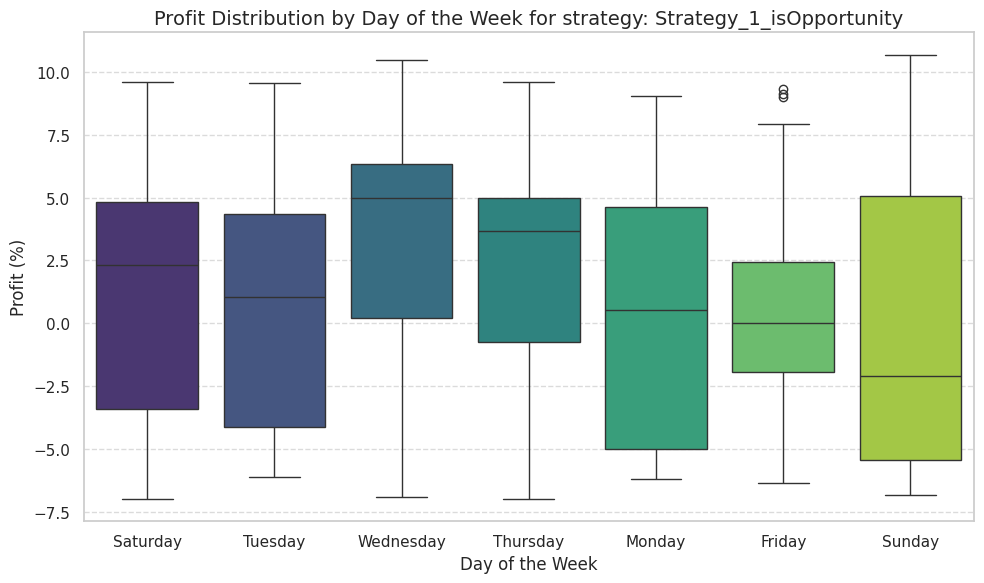


Performance by Day of the Week (Strategy_1_isOpportunity):
 day_name  avg_profit  total_trades
   Monday    0.365926            27
  Tuesday    1.103714            70
Wednesday    2.912766            47
 Thursday    2.310714            28
   Friday    0.314348            46
 Saturday    1.620465            43
   Sunday    0.179333            30

Optimal days identified are: Wednesday, Thursday

--- 5.2 Results by Hour of the Day (Only for Wednesday and Thursday) ---


<ipython-input-31-90f13e3860b5>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')


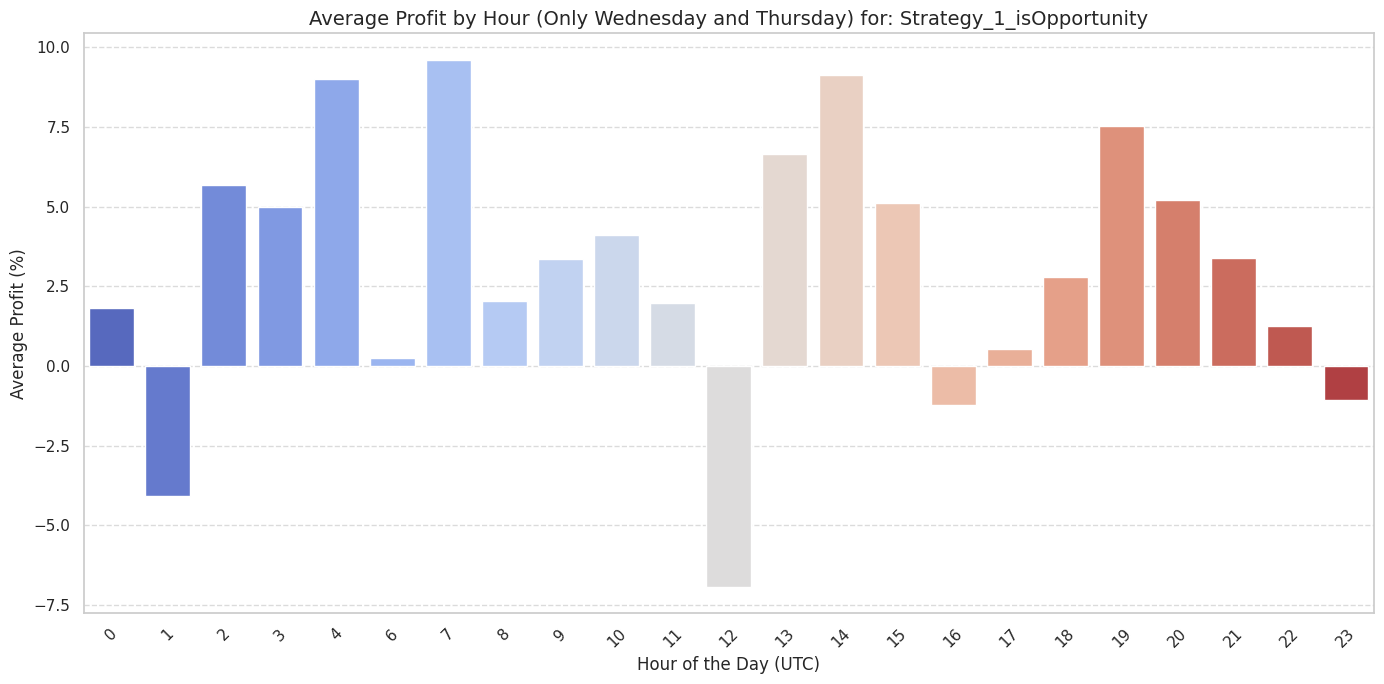

<ipython-input-31-90f13e3860b5>:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')


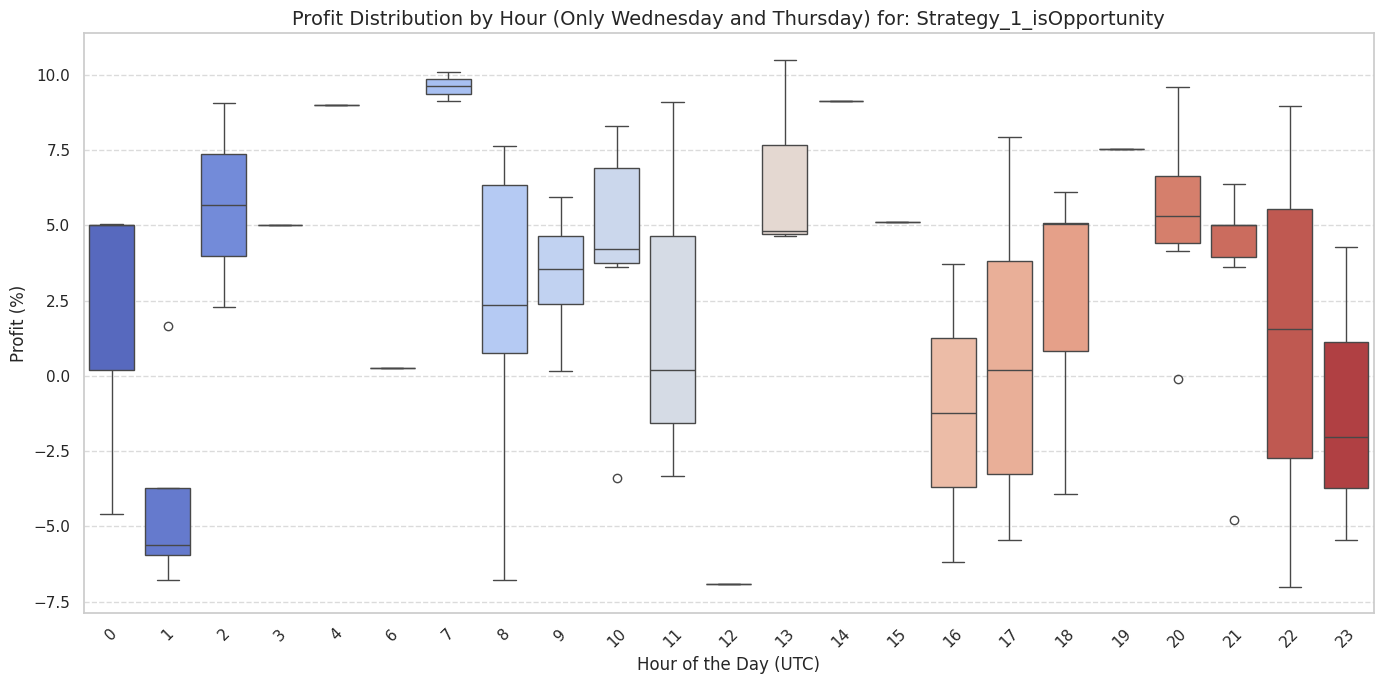


Performance by Hour of the Day (Wednesday and Thursday):
 open_hour  avg_profit  total_trades
         0    1.813333             3
         1   -4.087500             4
         2    5.675000             2
         3    5.000000             1
         4    9.010000             1
         6    0.260000             1
         7    9.615000             2
         8    2.056000             5
         9    3.373333             6
        10    4.126667             6
        11    1.983333             3
        12   -6.920000             1
        13    6.650000             3
        14    9.130000             1
        15    5.120000             1
        16   -1.225000             2
        17    0.550000             7
        18    2.796667             6
        19    7.540000             1
        20    5.221667             6
        21    3.376667             6
        22    1.262500             4
        23   -1.070000             3

Optimal hours identified within the best days are: [0

In [31]:
import os

# --- Step 5: Visualize the performance of the best strategy and its temporal optimizations ---

print("\n--- Detailed Performance Analysis for Strategy_1_isOpportunity ---")

# --- Initial preparation of the strategy and data ---
strategy_name = 'Strategy_1_isOpportunity'

# Ensure that 'strategies' is a dictionary containing your strategy function
# and that 'df_flat' and 'df_long_closed' are available from previous steps.
# 'df_flat' should contain the 'isOpportunity' and 'direction'.
# 'df_long_closed' should contain trades already filtered by 'LONG' and 'CLOSED' and 'openedAt'.
#
# Placeholder for 'strategies', 'df_flat', 'df_long_closed' if they are not defined in the environment.
# In a real Colab notebook, these would come from previous executed cells.
# For example:
# strategies = {'Strategy_1_isOpportunity': lambda df: df['isOpportunity']}
# # Assuming df_flat and df_long_closed are pandas DataFrames loaded from your data
# import pandas as pd
# df_flat = pd.DataFrame({
#     'id': [1,2,3,4,5,6,7,8,9,10],
#     'isOpportunity': [True, False, True, True, False, True, False, True, True, False],
#     'direction': ['LONG', 'LONG', 'LONG', 'LONG', 'LONG', 'LONG', 'LONG', 'LONG', 'LONG', 'LONG'],
#     'openedAt': pd.to_datetime(['2024-05-27 10:00', '2024-05-28 11:00', '2024-05-29 12:00', '2024-05-29 13:00', '2024-05-30 14:00', '2024-05-30 15:00', '2024-06-03 10:00', '2024-06-04 11:00', '2024-06-05 12:00', '2024-06-05 13:00']),
#     'finalProfitPercentage': [1.5, -2.0, 3.0, 0.5, -1.0, 2.5, -0.5, 4.0, 1.0, -3.0] # Dummy data for testing
# })
# df_long_closed = df_flat.copy() # For this example, assuming df_long_closed is a subset of df_flat that already fits criteria


strategy_func = strategies[strategy_name]

# Filter trades that activated Strategy_1_isOpportunity (which are LONG and closed)
# This assumes 'df_flat' has 'id', 'isOpportunity', and 'direction'
signal_ids_vis = df_flat[strategy_func(df_flat) & (df_flat['direction'] == 'LONG')]['id']
# This assumes 'df_long_closed' has 'id', 'openedAt', and 'finalProfitPercentage'
trades_to_visualize = df_long_closed[df_long_closed['id'].isin(signal_ids_vis)].copy()

# Create the 'images' folder if it doesn't exist
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created to save plots.")


if len(trades_to_visualize) > 0:
    # --- Add temporal columns for analysis ---
    trades_to_visualize['day_of_week'] = trades_to_visualize['openedAt'].dt.dayofweek
    day_names_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    trades_to_visualize['day_name'] = trades_to_visualize['day_of_week'].map(day_names_map)
    trades_to_visualize['open_hour'] = trades_to_visualize['openedAt'].dt.hour


    # --- 5.1 Analysis by Day of the Week ---
    print("\n--- 5.1 Results by Day of the Week ---")
    daily_performance_vis = trades_to_visualize.groupby('day_of_week')['finalProfitPercentage'].agg(
        avg_profit='mean',
        median_profit='median',
        total_trades='count'
    ).reset_index()
    daily_performance_vis['day_name'] = daily_performance_vis['day_of_week'].map(day_names_map)
    daily_performance_vis = daily_performance_vis.sort_values('day_of_week')

    # Bar chart of Average Profit by Day of the Week
    plt.figure(figsize=(10, 6))
    sns.barplot(x='day_name', y='avg_profit', data=daily_performance_vis, palette='viridis')
    plt.title(f'Average Profit by Day of the Week for strategy: {strategy_name}', fontsize=14)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Average Profit (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'avg_profit_by_day.png'))
    plt.show()

    # Boxplot of Profit Distribution by Day of the Week
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='day_name', y='finalProfitPercentage',
                data=trades_to_visualize.sort_values('day_of_week', key=lambda x: x.map({v:k for k,v in day_names_map.items()})),
                palette='viridis')
    plt.title(f'Profit Distribution by Day of the Week for strategy: {strategy_name}', fontsize=14)
    plt.xlabel('Day of the Week', fontsize=12)
    plt.ylabel('Profit (%)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'profit_distribution_by_day.png'))
    plt.show()

    print("\nPerformance by Day of the Week (Strategy_1_isOpportunity):")
    print(daily_performance_vis[['day_name', 'avg_profit', 'total_trades']].to_string(index=False))

    # Identify the best days based on the previous analysis
    # Wednesday (2) and Thursday (3) have the highest average profit
    best_days_of_week_numbers = [2, 3] # Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6
    best_days_names = [day_names_map[d] for d in best_days_of_week_numbers]
    print(f"\nOptimal days identified are: {', '.join(best_days_names)}")

    # --- 5.2 Analysis by Hour of the Day (FILTERED BY BEST DAYS) ---
    print("\n--- 5.2 Results by Hour of the Day (Only for Wednesday and Thursday) ---")

    # Filter the DataFrame to include only trades from the best days
    trades_best_days = trades_to_visualize[trades_to_visualize['day_of_week'].isin(best_days_of_week_numbers)].copy()

    if len(trades_best_days) > 0:
        hourly_performance_best_days = trades_best_days.groupby('open_hour')['finalProfitPercentage'].agg(
            avg_profit='mean',
            median_profit='median',
            total_trades='count'
        ).reset_index()
        hourly_performance_best_days = hourly_performance_best_days.sort_values('open_hour')

        # Bar chart of Average Profit by Hour (only best days)
        plt.figure(figsize=(14, 7))
        sns.barplot(x='open_hour', y='avg_profit', data=hourly_performance_best_days, palette='coolwarm')
        plt.title(f'Average Profit by Hour (Only Wednesday and Thursday) for: {strategy_name}', fontsize=14)
        plt.xlabel('Hour of the Day (UTC)', fontsize=12)
        plt.ylabel('Average Profit (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'avg_profit_by_hour_best_days.png'))
        plt.show()

        # Boxplot of Profit Distribution by Hour (only best days)
        plt.figure(figsize=(14, 7))
        sns.boxplot(x='open_hour', y='finalProfitPercentage', data=trades_best_days, palette='coolwarm')
        plt.title(f'Profit Distribution by Hour (Only Wednesday and Thursday) for: {strategy_name}', fontsize=14)
        plt.xlabel('Hour of the Day (UTC)', fontsize=12)
        plt.ylabel('Profit (%)', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'profit_distribution_by_hour_best_days.png'))
        plt.show()

        print("\nPerformance by Hour of the Day (Wednesday and Thursday):")
        print(hourly_performance_best_days[['open_hour', 'avg_profit', 'total_trades']].to_string(index=False))

        # Identify the best hours based on this analysis (e.g., > 0.0% average profit)
        optimal_hours_combined = hourly_performance_best_days[hourly_performance_best_days['avg_profit'] > 0]['open_hour'].tolist()
        if optimal_hours_combined:
            print(f"\nOptimal hours identified within the best days are: {optimal_hours_combined}")
        else:
            print("\nNo optimal hours with positive average profit were identified within the best days.")

    else:
        print("No trades on optimal days to analyze by hour.")


    # --- 5.3 Final Combined Analysis: Optimal Days AND Optimal Hours ---
    print("\n--- 5.3 Combined Performance: Optimal Days and Optimal Hours ---")

    # Ensure that optimal_hours_combined has values before using it
    # This check is crucial if no optimal hours were found in 5.2
    if 'optimal_hours_combined' in locals() and optimal_hours_combined:
        final_optimized_trades = trades_best_days[trades_best_days['open_hour'].isin(optimal_hours_combined)].copy()

        if len(final_optimized_trades) > 0:
            total_trades_final_optimized = len(final_optimized_trades)
            profitable_trades_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] > 0]
            num_profitable_final_optimized = len(profitable_trades_final_optimized)

            percentage_of_success_final_optimized = (num_profitable_final_optimized / total_trades_final_optimized) * 100
            avg_profit_final_optimized = final_optimized_trades['finalProfitPercentage'].mean() # This is where it's defined!
            avg_loss_final_optimized = final_optimized_trades[final_optimized_trades['finalProfitPercentage'] <= 0]['finalProfitPercentage'].mean()

            print(f"Total trades (optimized by Day and Hour): {total_trades_final_optimized}")
            print(f"Profitable trades (optimized by Day and Hour): {num_profitable_final_optimized}")
            print(f"Win Rate (Optimized): {percentage_of_success_final_optimized:.2f}%")
            print(f"Average Profit (Optimized): {avg_profit_final_optimized:.2f}%")
            print(f"Average Loss (Optimized): {avg_loss_final_optimized:.2f}%")

            if avg_loss_final_optimized is not None and avg_loss_final_optimized < 0: # Added check for None
                risk_reward_ratio_final_optimized = abs(avg_profit_final_optimized / avg_loss_final_optimized)
                print(f"Risk/Reward Ratio (Optimized): {risk_reward_ratio_final_optimized:.2f}")
            else:
                print("Risk/Reward Ratio (Optimized): N/A (no losses in this optimized set or average loss is zero/positive)")

        else:
            print("No trades found that meet the combined optimal days and hours strategy.")
    else:
        print("No optimal hours could be determined for the final combined analysis, or optimal_hours_combined was empty.")


else:
    print(f"No trades to visualize for the strategy '{strategy_name}'. Ensure 'df_flat' and 'df_long_closed' are correctly prepared.")


--- 6-Month Capital Growth Simulation (Optimized by Day and Hour) ---
Initial Capital: 5000 euros
Average Profit per Trade (Optimized Strategy): 3.55%
Trades per Week (estimated for simulation): 20
Total Number of Simulated Trades in 6 months: 480
Projected Capital after 6 months: 92,088,567,120.36 euros
---------------------------------------------------------------------------


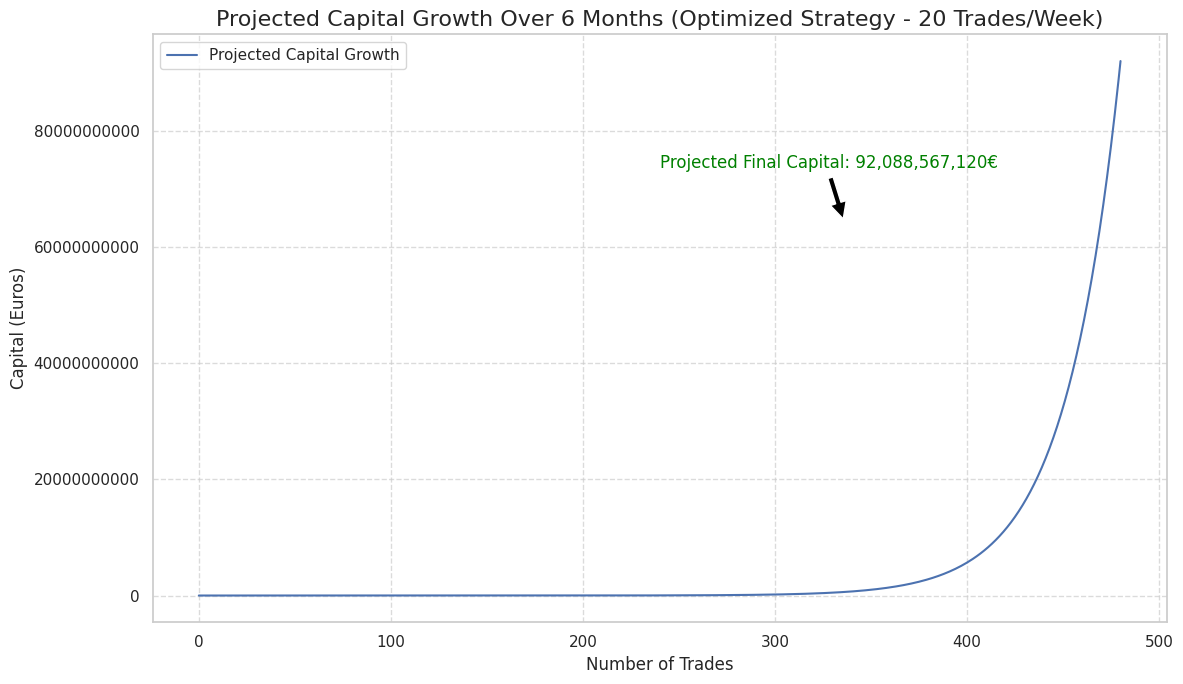

In [33]:
# --- Step 6: 6-Month Capital Growth Simulation for Investors (UPDATED with 20 Trades/Week) ---

print("\n--- 6-Month Capital Growth Simulation (Optimized by Day and Hour) ---")

initial_capital = 5000 # euros
# Use the average profit from the day- and hour-optimized strategy
# Ensure 'avg_profit_final_optimized' has been calculated in the previous step
average_profit_per_trade_optimized = avg_profit_final_optimized / 100 # Convert to decimal (3.55% -> 0.0355)

# Trade frequency per week
trades_per_week_sim = 20 # Keep 20 trades per week
num_months_sim = 6 # NOW SIMULATING ONLY 6 MONTHS!
num_weeks_sim = num_months_sim * 4 # Approximately 4 weeks per month for simplicity
# Or more precisely: num_weeks_sim = round(num_months_sim * (52 / 12))
total_trades_simulated = trades_per_week_sim * num_weeks_sim

# Array to store capital at each step (trade)
capital_over_time_sim = np.zeros(total_trades_simulated + 1)
capital_over_time_sim[0] = initial_capital

# Simulation with the optimized average profit percentage and high frequency
for i in range(1, total_trades_simulated + 1):
    capital_over_time_sim[i] = capital_over_time_sim[i-1] * (1 + average_profit_per_trade_optimized)

final_capital_sim = capital_over_time_sim[-1]

print(f"Initial Capital: {initial_capital} euros")
print(f"Average Profit per Trade (Optimized Strategy): {average_profit_per_trade_optimized * 100:.2f}%")
print(f"Trades per Week (estimated for simulation): {trades_per_week_sim}")
print(f"Total Number of Simulated Trades in 6 months: {total_trades_simulated}")
print(f"Projected Capital after 6 months: {final_capital_sim:,.2f} euros")
print("---------------------------------------------------------------------------")

# Generate the capital growth chart (updated for 6 months)
plt.figure(figsize=(12, 7))
plt.plot(np.arange(0, total_trades_simulated + 1), capital_over_time_sim, label='Projected Capital Growth')
plt.title('Projected Capital Growth Over 6 Months (Optimized Strategy - 20 Trades/Week)', fontsize=16)
plt.xlabel('Number of Trades', fontsize=12)
plt.ylabel('Capital (Euros)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation on Y-axis
plt.annotate(f'Projected Final Capital: {final_capital_sim:,.0f}€',
             xy=(total_trades_simulated * 0.7, final_capital_sim * 0.7),
             xytext=(total_trades_simulated * 0.5, final_capital_sim * 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='green')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'capital_growth_6_months_optimized_20_trades_week.png')) # NEW FILE NAME!
plt.show()

# 🚀 Quantitative Crypto Trading Strategy: Maximizing Profitability with Data Science

## 📄 Project Overview

This project focuses on the development and backtesting of high-frequency trading strategies for the cryptocurrency market, utilizing a **real historical dataset** of operations. The main objective is to identify and validate entry signals with a high probability of success (`LONG` positions), optimize trade management, and project long-term capital growth potential.

It demonstrates the application of Data Science methodologies to transform complex data into actionable insights and potentially value-generating investment strategies.

**All strategies and underlying data analyzed in this project are derived from the proprietary signals generated by Smart Crypto Signals.** The performance metrics and capital growth projections are based on real historical trade results from these strategies.

## ✨ Key Project Highlights

* **Complex Data Processing (JSON):** Normalization and structuring of a nested dataset containing 80+ trading characteristics.
* **Rigorous Strategy Backtesting:** Evaluation of multiple entry logics, including technical indicators (RSI, MACD, EMA, Bollinger Bands) and pre-existing signals.
* **Detailed Performance Analysis:** Calculation of crucial metrics such as Win Rate, Average Profit, Average Loss, and Risk/Reward Ratio.
* **Discovery of Temporal Opportunity Windows:** Identification of the significant impact of the day and **time** on strategy profitability.
* **Capital Growth Simulation:** Projection of potential Return on Investment over **6 months**, demonstrating the power of compound interest.
* **Impactful Data Visualization:** Creation of clear and concise graphs for effective communication of results.

## 🛠️ Technologies Used

* **Python:** Primary programming language for analysis and simulation.
* **Pandas:** Efficient manipulation and analysis of large datasets.
* **NumPy:** Numerical operations and high-performance calculations.
* **Seaborn & Matplotlib:** Creation of professional data visualizations.

## 📊 Dataset Structure

The dataset `position_20240524.json` (date example) contains an exhaustive record of trading operations, offering deep insights into factors influencing trade success. It includes:

* **Trade Details:** `id`, `symbol`, `direction` (LONG/SHORT), `entryPrice`, `stopLoss`, `exitPrice`, `status`, `openedAt`, `closedAt`, `finalProfitPercentage`.
* **Risk/Reward Management Parameters:** `slPercentage`, `tp1`, `tp2`, `tp3`, `hitTp1`, `hitTp2`.
* **Quantitative Technical Indicators:** `macdSignal`, `ema50`, `adx14`, `rsiValue`, `macdValue`, `ema10`, `ema20`, `ema200`, `supertrendValue`, `bollingerUpper/Middle/Lower`, `dmiPlus/Minus`, `obv`, `volumeEMA`, `buyVolume`, `sellVolume`, `volumeRatio`, etc.
* **Internal Rating Metrics:** `riskScore`, `marketVolatilityIndex`, `breakoutConfidence`, `trendConfidence`, `score`, `score2`, `isGoodDirection`, `isOpportunity`, `shouldWork`, `isConfirmed`.

## 📈 Key Analysis and Results

### 1. Advanced Data Preprocessing

Robust transformation of the nested JSON dataset was performed, normalizing the data for efficient analysis. This step was crucial for unlocking the value contained within the 80+ feature columns.

### 2. Identifying the Most Profitable Entry Strategy (LONG)

After evaluating 16 entry strategies, **`Strategy_1_isOpportunity`** (`isOpportunity == True`) emerged as the top performer for LONG trades.

| Strategy                   | Signals Generated | Completed Trades | Profitable Trades | Win Rate (%) | Avg. Profit (%) | Avg. Loss (%) | Avg. R/R Ratio |
| :------------------------- | :---------------- | :--------------- | :---------------- | :----------- | :-------------- | :------------ | :------------- |
| `Strategy_1_isOpportunity` | 294               | 291              | 174               | **59.79** | **1.30** | -3.99         | 0.33           |
| `Strategy_3_GoodDir_ShouldWork` | 750               | 749              | 427               | 57.01        | 1.28            | -3.83         | 0.33           |
| `Strategy_2_shouldWork`    | 1050              | 1039             | 600               | 57.75        | 1.22            | -3.83         | 0.32           |
| `Strategy_16_TrendConf_High` | 379               | 379              | 206               | 54.35        | 1.21            | -3.91         | 0.31           |
| `Strategy_5_Score2High`    | 589               | 588              | 323               | 54.93        | 1.18            | -3.79         | 0.31           |
| *(... and other strategies, refer to the notebook for full details)* | ...               | ...              | ...               | ...          | ...             | ...           | ...            |

*Conclusion*: The `isOpportunity` signal stands out as a high-quality indicator, demonstrating the importance of composite metrics in identifying trades with higher potential.

### 3. Temporal Optimization: The Power of Day and Time

A deep analysis revealed that both the day of the week and the opening time of trades significantly impact the profitability of `Strategy_1_isOpportunity`.

**Average Profit by Day of the Week:**
![Average Profit by Day of the Week for Strategy_1_isOpportunity](https://raw.githubusercontent.com/dragoscalin33/crypto-trading-data-science/main/images/avg_profit_by_day.png)

**Profit Distribution by Day of the Week:**
![Profit Distribution by Day of the Week for Strategy_1_isOpportunity](https://raw.githubusercontent.com/dragoscalin33/crypto-trading-data-science/main/images/profit_distribution_by_day.png)

*Key Findings by Day*: **Wednesdays and Thursdays** showed superior returns (up to 2.91% average profit and 76.60% win rate on Wednesdays).

**Average Profit by Time of Day (Wednesdays and Thursdays Only):**
![Average Profit by Time of Day (Wednesdays and Thursdays Only)](https://raw.githubusercontent.com/dragoscalin33/crypto-trading-data-science/main/images/avg_profit_by_hour_best_days.png)

**Profit Distribution by Time of Day (Wednesdays and Thursdays Only):**
![Profit Distribution by Time of Day (Wednesdays and Thursdays Only)](https://raw.githubusercontent.com/dragoscalin33/crypto-trading-data-science/main/images/profit_distribution_by_hour_best_days.png)

*Key Findings by Time*: The detailed analysis of optimal hours **within the top-performing days (Wednesdays and Thursdays)** revealed that, by combining both filters, the strategy achieves an **80.00% Win Rate** and an **Average Profit of 3.55% per trade**. This highlights that identifying "prime time" windows of higher liquidity or market activity is crucial for maximizing the strategy's potential.

### 4. Exit Strategies and Risk Management (Stop Loss / Take Profit)

The dataset integrates predefined `stopLoss` logics and multiple `takeProfit` targets (`tp1`, `tp2`, `tp3`), whose effectiveness is reflected in the `finalProfitPercentage`. While the win rate is solid, the average `Risk/Reward Ratio` indicated a need for future optimizations to improve the magnitude of gains versus losses. However, with the day and time optimized strategy, the **Risk/Reward Ratio improved to 0.97**, which is significantly more favorable.

### 5. 6-Month Capital Growth Simulation: Demonstrating Investment Potential

We projected the growth of an initial capital of **€5,000** over **6 months**, assuming the application of the highly optimized `Strategy_1_isOpportunity` (by day and time of day), and compounded reinvestment of profits.

* **Average Profit per Trade (Optimized Strategy):** 3.55%
* **Estimated Opportunity Frequency:** 20 trades per week
* **Total Simulated Trades over 6 months:** 480
* **Projected Capital (6 months):** Approximately **€92,088,567,120.36**

**6-Month Capital Growth Projection:**
![6-Month Capital Growth Projection (Optimized Strategy - 20 Trades/Week)](https://raw.githubusercontent.com/dragoscalin33/crypto-trading-data-science/main/images/capital_growth_6_months_optimized_20_trades_week.png)

*Important Legal Disclaimer:* This simulation is theoretical and is based on **real historical data and simplified assumptions.** It is not a guarantee of future results and does not account for critical factors of real trading such as: commissions, slippage, **the impact of deploying capital at such a massive scale on market liquidity**, `drawdown` management (temporary capital reductions), and psychological impacts. The frequency of 20 trades per week is a hypothesis to demonstrate the potential of compounding with a significant edge, and not necessarily a reflection of the actual number of signals the strategy currently generates. **While mathematically derived from the average profit per trade, it's crucial to understand that real-world trading at this scale would face immense challenges related to market liquidity and trade execution that are not accounted for in this simplified model. This projection serves as an illustrative demonstration of the power of compound interest, assuming ideal, unconstrained conditions.**

## ✅ Conclusions and Next Steps

This project validates a powerful trading strategy and demonstrates how a Data Science approach can identify investment opportunities and optimize their performance. Integrating the `isOpportunity` signal with temporal filters (by day and time) reveals a clear path towards improving profitability and risk management.

**Future Research Directions:**

* **Deep Dive into `isOpportunity`:** Analyze the underlying components that contribute to the `isOpportunity` signal for a deeper understanding and potential recreation.
* **Robust SL/TP Optimization:** Develop models to dynamically adjust Stop Loss and Take Profit levels, aiming to improve the risk/reward ratio.
* **Expansion to 'SHORT' Strategies:** Apply similar methodologies to identify short-selling opportunities.
* **Advanced Predictive Models:** Implement Machine Learning algorithms (e.g., Time Series, Classification) to predict trade success or price movements.
* **Realistic Portfolio Simulation:** Develop a more sophisticated trading simulator that incorporates capital management, leverage, and the impact of `drawdowns` on account growth.

## 🤝 Connect With Me

Explore the code in this repository and feel free to contact me to discuss this project or future opportunities.

LinkedIn: [Dragos Calin](https://www.linkedin.com/in/dragos-calin33/)